In [113]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [114]:
from tensorflow import keras
import tensorflow as tf

In [115]:
df_train=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [116]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
independent=df_train.iloc[:,1::]
dependent=df_train.iloc[:,:1]
dependent_vec=keras.utils.to_categorical(dependent,10)
independent_test=df_test

In [118]:
print(dependent.value_counts())
print(dependent_vec[2])

label
1        4684
7        4401
3        4351
9        4188
2        4177
6        4137
0        4132
4        4072
8        4063
5        3795
dtype: int64
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [119]:
def sizeImage(df):
    import pandas as pd
    import numpy as np
    df=df/255.0
    lst=[]
    for i in range(len(df)):
        lst.append(df.iloc[i].to_numpy().reshape(28,28))
    #return pd.DataFrame(lst)
    return np.array(lst)

(42000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

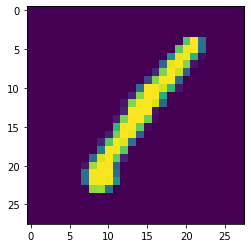

In [120]:
independent_sized=sizeImage(independent)
print(independent_sized.shape)
print(independent_sized[0])
plt.imshow(independent_sized[0])

(28000, 28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

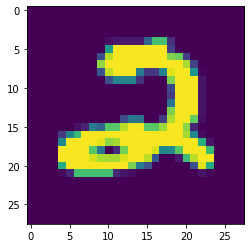

In [121]:
independent_test_sized=sizeImage(independent_test)
print(independent_test_sized.shape)
print(independent_test_sized[0])
plt.imshow(independent_test_sized[0])

In [122]:
#from sklearn.model_selection import train_test_split 
#X_train,  X_test,Y_train,Y_test = train_test_split(independent_sized,dependent,test_size=0.2,random_state=42)

In [133]:
independent_sized.shape

(42000, 28, 28)

In [156]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(256,activation='sigmoid'))
# model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(128,activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='sigmoid'))
      
model.compile(
    optimizer='sgd',
    loss='mean_squared_error',
    metrics=['accuracy'])

model.summary()

ValueError: Input 0 of layer conv2d_3 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 784)

In [155]:
model.fit(independent_sized, dependent_vec, verbose=True,epochs=100,validation_split=0.2)

Epoch 1/100
1050/1050 [==============================] - 3s 2ms/step - loss: 0.1469 - accuracy: 0.1011 - val_loss: 0.0909 - val_accuracy: 0.1382
Epoch 2/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0905 - accuracy: 0.1505 - val_loss: 0.0899 - val_accuracy: 0.1544
Epoch 3/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0899 - accuracy: 0.1559 - val_loss: 0.0898 - val_accuracy: 0.1550
Epoch 4/100
1050/1050 [==============================] - 3s 2ms/step - loss: 0.0898 - accuracy: 0.1478 - val_loss: 0.0897 - val_accuracy: 0.1610
Epoch 5/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0897 - accuracy: 0.1636 - val_loss: 0.0897 - val_accuracy: 0.1573
Epoch 6/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0897 - accuracy: 0.1508 - val_loss: 0.0896 - val_accuracy: 0.1642
Epoch 7/100
1050/1050 [==============================] - 2s 2ms/step - loss: 0.0896 - accuracy: 0.1668 - val_loss: 0.0896 - val_ac

KeyboardInterrupt: 

In [153]:
submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')
submission['Label']=np.argmax(model.predict(independent_test),axis=-1)
submission.head()
submission.to_csv('submission.csv', index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,2
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
